# Importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Reading data

In [4]:
data = pd.read_csv("./Dataset/Crop_recommendation.csv")

In [5]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [6]:
data.shape

(2200, 8)

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Plotting Graphs

### 1. Nitrogen

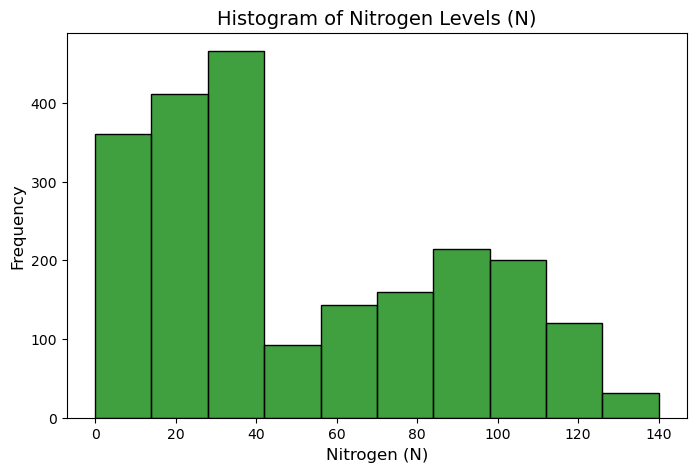

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(data['N'], bins=10, color='green')
plt.title('Histogram of Nitrogen Levels (N)', fontsize=14)
plt.xlabel('Nitrogen (N)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### 2. Potassium

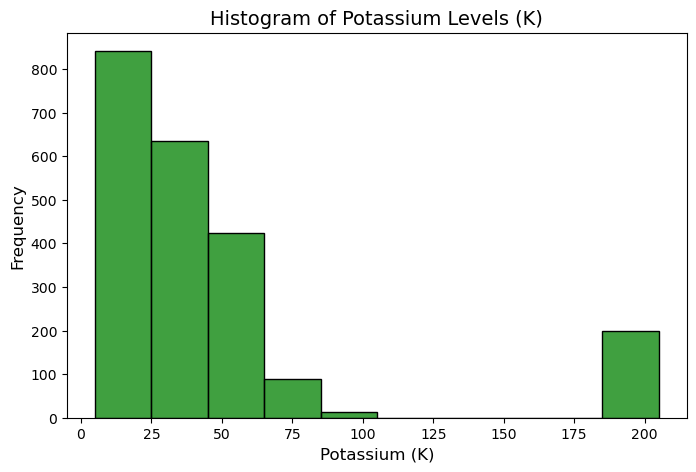

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data['K'], bins=10, color='green')
plt.title('Histogram of Potassium Levels (K)', fontsize=14)
plt.xlabel('Potassium (K)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### 3. Phosphorous

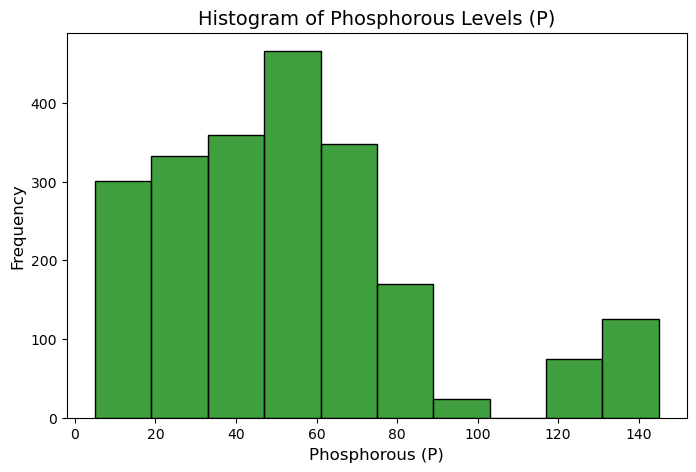

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data['P'], bins=10, color='green')
plt.title('Histogram of Phosphorous Levels (P)', fontsize=14)
plt.xlabel('Phosphorous (P)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### 4. Temperature

<Axes: xlabel='temperature'>

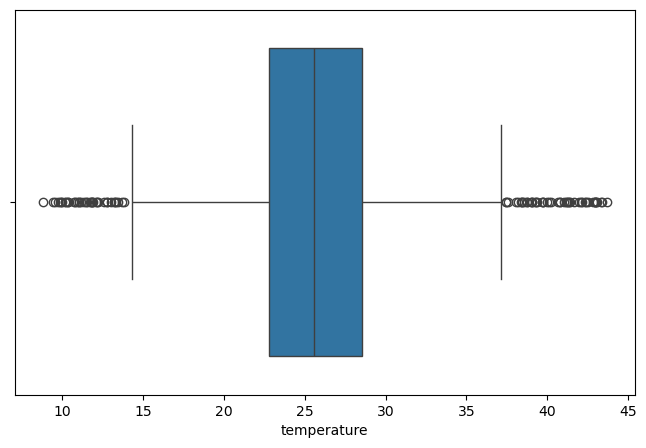

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data.temperature)

### 5. Humidity

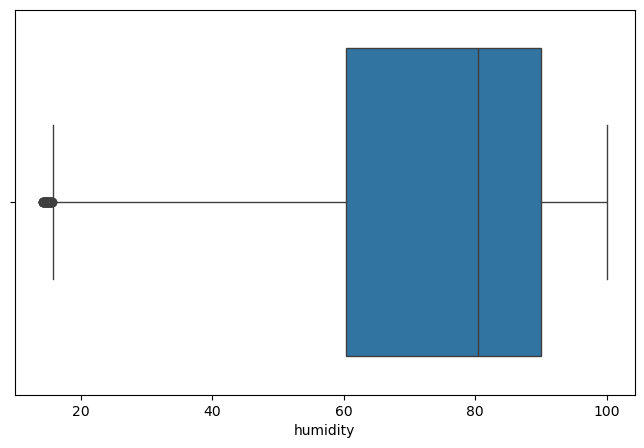

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data.humidity);

### 6. PH for crops

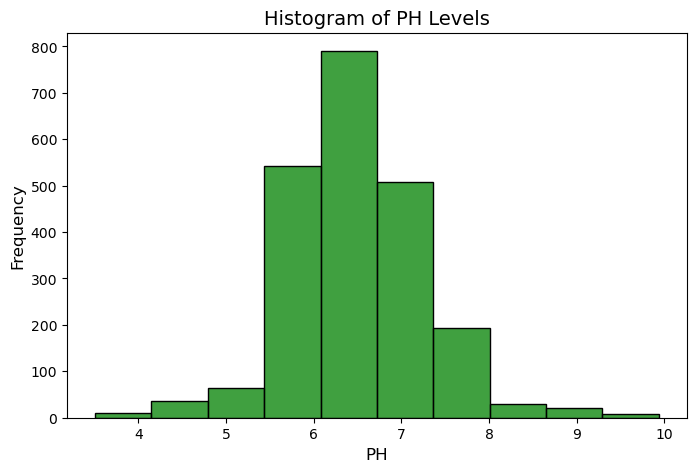

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data['ph'], bins=10, color='green')
plt.title('Histogram of PH Levels', fontsize=14)
plt.xlabel('PH', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### 7. Rainfall

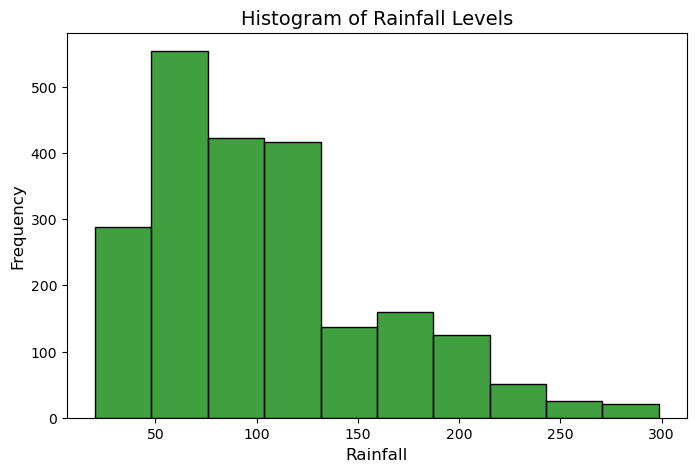

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data['rainfall'], bins=10, color='green')
plt.title('Histogram of Rainfall Levels', fontsize=14)
plt.xlabel('Rainfall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Split Data

In [24]:
x = data.iloc[:,:-1] # features
y = data.iloc[:,-1] # labels

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Models

### Logistic Regression

In [28]:
logistic_model = LogisticRegression(max_iter = 700)
logistic_model.fit(x_train, y_train)
print(f"Accuracy Score for Logistic Regression is : {logistic_model.score(x_test, y_test) * 100} %") 

Accuracy Score for Logistic Regression is : 94.54545454545455 %


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [30]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
print(f"Accuracy Score for Random Forest is : {random_forest.score(x_test, y_test) * 100} %") 

Accuracy Score for Random Forest is : 99.31818181818181 %


### Support Vector Machine

In [32]:
svc = SVC()
svc.fit(x_train, y_train)
print(f"Accuracy Score for Support Vector Machine is : {svc.score(x_test, y_test) * 100} %") 

Accuracy Score for Support Vector Machine is : 96.13636363636363 %


## Random Forest gives the highest accuracy here.

In [34]:
y_pred = random_forest.predict(x_test)
print(y_pred)

['muskmelon' 'watermelon' 'papaya' 'papaya' 'apple' 'mango' 'apple'
 'mothbeans' 'mungbean' 'lentil' 'blackgram' 'coconut' 'pomegranate'
 'jute' 'coconut' 'pomegranate' 'apple' 'maize' 'papaya' 'muskmelon'
 'coffee' 'papaya' 'orange' 'papaya' 'chickpea' 'jute' 'mungbean' 'orange'
 'pigeonpeas' 'rice' 'pomegranate' 'mothbeans' 'jute' 'lentil' 'jute'
 'blackgram' 'jute' 'chickpea' 'chickpea' 'kidneybeans' 'papaya' 'mango'
 'blackgram' 'maize' 'mungbean' 'maize' 'pigeonpeas' 'coconut' 'muskmelon'
 'maize' 'blackgram' 'coffee' 'grapes' 'mungbean' 'coffee' 'kidneybeans'
 'cotton' 'apple' 'banana' 'blackgram' 'watermelon' 'coconut' 'lentil'
 'orange' 'papaya' 'pigeonpeas' 'orange' 'rice' 'muskmelon' 'pigeonpeas'
 'muskmelon' 'coconut' 'jute' 'banana' 'blackgram' 'papaya' 'banana'
 'cotton' 'watermelon' 'orange' 'coffee' 'chickpea' 'rice' 'mothbeans'
 'orange' 'mango' 'coffee' 'mothbeans' 'blackgram' 'pomegranate' 'maize'
 'mothbeans' 'cotton' 'papaya' 'pigeonpeas' 'mothbeans' 'kidneybeans'
 

In [35]:
x_test.head()

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465


In [61]:
new_features = [[30, 135, 180, 20.66024, 84.3189, 6.3991, 114.9263]]
predicted_crop = random_forest.predict(new_features)
print("Predicted crop : ", predicted_crop)

Predicted crop :  ['grapes']


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
import pickle

In [38]:
pickle.dump(random_forest, open("model.pkl", "wb"))